# Copia: quickstart

In [1]:
import pandas as pd

Load data:

In [2]:
df = pd.read_csv('datasets/dum.csv', sep=';', header=None)
df.columns = 'work', 'signature'
df.head()

,work,signature
0,Aiol (1),"Leiden, UB, BPL 1049; Brussel, KB, IV 816"
1,Aiol (2),"Breda, Arch. Begijnhof, z.s."
2,Alexanders geesten,"München, Bayerische Staatsbibliotheek, Cod. ge..."
3,Alexanders geesten,"Gent, UB, 2749,6"
4,Alexanders geesten,"Leiden, UB, Ltk. 1196"


Convert to abundance data:

In [3]:
from copia.utils import to_abundance
works = df['work']
abundance = to_abundance(works)
print(abundance)
print(abundance.sum())

[ 1  1  5  2  1  2  1  1  2  2  3  3  1  1  2  1  1  1  1  2  1  1  1  1
  1  1  4  1  1  7  1  1  3  1 10  1  3  2 10  4  2  1  3  6  5  2  5  2
  5  1  1  1  1  1  2 17  2  1  1  2  1  1  1  3  1  1  1  1  1  1  1  1
  1  1  1]
167


In [4]:
from copia.hill import hill_numbers
emp, est = hill_numbers(abundance)

100%|██████████| 1000/1000 [00:15<00:00, 64.43it/s]


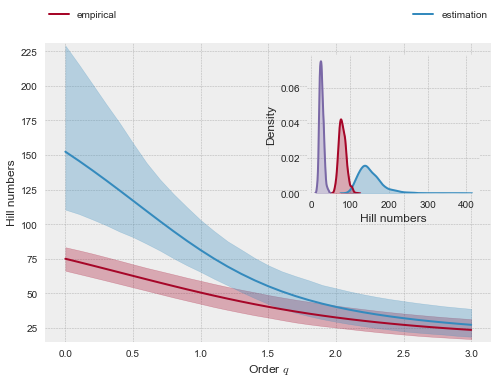

In [5]:
import copia.plot as plot
plot.hill_plot(emp, est)

100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


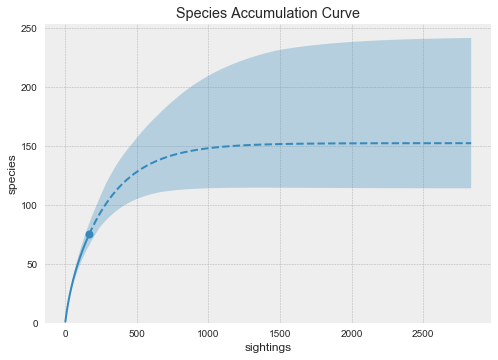

In [6]:
plot.species_accumulation_curve(abundance, incl_minsample=False)

In [ ]:
plot.species_accumulation_curve(abundance, incl_minsample=True)

In [ ]:
plot.abundance_histogram(abundance)

In [ ]:
plot.abundance_counts(abundance)

Apply chao1:

In [ ]:
from copia.richness import diversity
print('Empirical (species):', diversity(abundance)) # = diversity(abundance, method='empirical')
print('Empirical (sightings):', diversity(abundance, species=False))
print('chao1:', diversity(abundance, method='chao1'))
print('iChao1:', diversity(abundance, method='iChao1'))
print('ACE:', diversity(abundance, method='ACE'))
print('Egghe & Proot:', diversity(abundance, method='egghe_proot'))
print('Jackknife:', diversity(abundance, method='jackknife'))

In [ ]:
print(diversity(abundance, method='jackknife', return_order=True))
print(diversity(abundance, method='jackknife', return_order=True, return_ci=True))
print(diversity(abundance, method='jackknife', return_ci=True, conf=.89))
print(diversity(abundance, method='jackknife', return_order=False,
               return_ci=True, conf=.89))

In [ ]:
print(diversity(abundance, method='minsample'))
print(diversity(abundance, method='minsample', solver='grid'))
print(diversity(abundance, method='minsample', solver='fsolve'))
print(diversity(abundance, method='minsample', solver='grid', tolerance=1e-10))

## Compare multiple assemblages

In [8]:
assemblages = {}
for lang in ('dum', 'isl', 'gle', 'eng'):
    works = pd.read_csv(f'datasets/{lang}.csv', sep=';',
                        header=None).iloc[:, 0]
    assemblages[lang] = to_abundance(works)

In [5]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical)

NameError: name 'diversity' is not defined

In [ ]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical, normalize=True,
                          title=f'Normalized survival ratio: iChao1({lang})')

In [ ]:
df = plot.survival(assemblages, method='iChao1')
df

In [ ]:
plot.survival_error(df)

In [ ]:
df = plot.survival(assemblages, method='minsample')
plot.survival_error(df)
df

In [ ]:
import copia.plot as plot
from copia.hill import hill_numbers

hill_est = {}
for lang, assemblage in assemblages.items():
    emp, est = hill_numbers(assemblage)
    plot.hill_plot(emp, est)
    hill_est[lang] = est

 83%|████████▎ | 830/1000 [00:12<00:02, 65.48it/s]

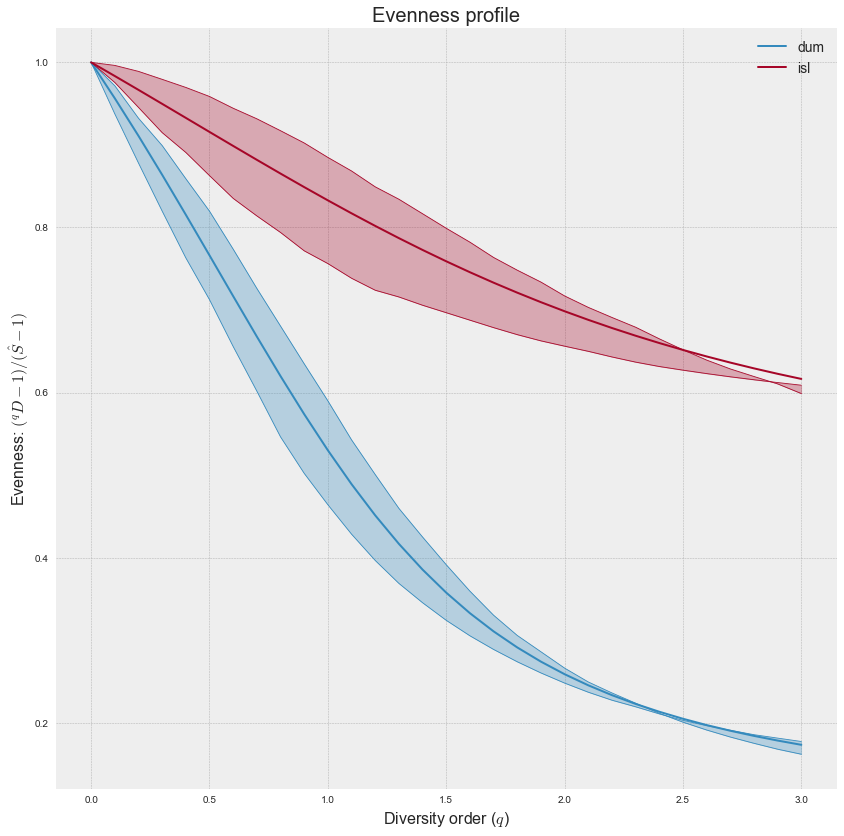

In [7]:
plot.evenness_plot(hill_est, incl_CI=True)